# Wikipedia and Wikidata concepts

## Libraries

In [1]:
import pandas as pd
import urllib
import csv

In [2]:
df_c = pd.read_csv('data/openalex_concepts.tsv', sep='\t')
df_c.shape

(65073, 7)

In [3]:

df_p = pd.read_csv('data/page.tsv', sep='\t', quoting=csv.QUOTE_NONE)
df_p.shape

(53710529, 15)

In [4]:
df_p = df_p[df_p.namespace==0].copy()
df_p

,page_id,namespace,title,is_redirect,is_new,touched,links_updated,latest,len,content_model,page_edits,creation,editors,views,references
0,10,0,AccessibleComputing,1,0,20210607122734,2.021061e+13,1002250816,111,wikitext,14.0,2001-01-21,13.0,186.0,NaN
1,12,0,Anarchism,0,0,20210701093040,2.021070e+13,1030472204,96584,wikitext,19819.0,2001-10-11,3773.0,237226.0,92.0
2,13,0,AfghanistanHistory,1,0,20210629133822,2.021061e+13,783865149,90,wikitext,6.0,2001-04-05,5.0,47.0,NaN
3,14,0,AfghanistanGeography,1,0,20210607122734,2.021061e+13,783865160,92,wikitext,7.0,2001-01-21,7.0,23.0,NaN
4,15,0,AfghanistanPeople,1,0,20210629123442,2.021061e+13,783865293,95,wikitext,8.0,2001-01-21,7.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53710509,68103359,0,Carrie_Flemmer,0,1,20210701094546,2.021070e+13,1031387168,1300,wikitext,1.0,2021-07-01,1.0,NaN,NaN
53710510,68103360,0,US_des_Forces_Armees,1,1,20210701094549,2.021070e+13,1031387177,35,wikitext,1.0,2021-07-01,1.0,NaN,NaN
53710512,68103362,0,Carrie_Flemmer-Marshall,1,1,20210701094611,2.021070e+13,1031387212,27,wikitext,1.0,2021-07-01,1.0,NaN,NaN
53710515,68103365,0,Dapp_Browsers,0,1,20210701094630,2.021070e+13,1031387241,2682,wikitext,3.0,2021-07-01,2.0,NaN,NaN


In [7]:
df_c

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer%20science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,https://en.wikipedia.org/wiki/Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,https://en.wikipedia.org/wiki/Case%20report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,https://en.wikipedia.org/wiki/ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,https://en.wikipedia.org/wiki/Antenna%20amplifier


In [5]:
df_c = df_c[~df_c.wikipedia_url.isna()].copy()
df_c

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer%20science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,https://en.wikipedia.org/wiki/Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,https://en.wikipedia.org/wiki/Case%20report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,https://en.wikipedia.org/wiki/ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,https://en.wikipedia.org/wiki/Antenna%20amplifier


In [6]:
df_c.wikipedia_url = [urllib.parse.unquote(x) for x in df_c.wikipedia_url.tolist()]
df_c

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,https://en.wikipedia.org/wiki/Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,https://en.wikipedia.org/wiki/Case report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,https://en.wikipedia.org/wiki/ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,https://en.wikipedia.org/wiki/Antenna amplifier


In [7]:
df_c[df_c.wikipedia_url.str.contains('^https://en.wikipedia.org/wiki/', regex=True)]

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,https://en.wikipedia.org/wiki/Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,https://en.wikipedia.org/wiki/Case report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,https://en.wikipedia.org/wiki/ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,https://en.wikipedia.org/wiki/Antenna amplifier


In [8]:
df_c.wikipedia_url = df_c.wikipedia_url.str.replace('^https://en.wikipedia.org/wiki/', '', regex=True)
df_c.wikipedia_url = df_c.wikipedia_url.str.replace('\s', '_', regex=True)
df_c

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,Computer_science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,Case_report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,Antenna_amplifier


In [9]:
df_pc = df_c.merge(df_p, how='inner', left_on='wikipedia_url', right_on='title')
df_pc

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url,page_id,namespace,title,...,touched,links_updated,latest,len,content_model,page_edits,creation,editors,views,references
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,Computer_science,5323,0,Computer_science,...,20210629135701,2.021063e+13,1030837861,64138,wikitext,6531.0,2001-11-18,3190.0,221713.0,67.0
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,Medicine,18957,0,Medicine,...,20210629123640,2.021063e+13,1031037995,93342,wikitext,5498.0,2001-11-15,2624.0,129501.0,64.0
2,https://openalex.org/C2993312423,Medical practice,2,"field of study for diagnosing, treating and pr...",14157,64448,Medicine,18957,0,Medicine,...,20210629123640,2.021063e+13,1031037995,93342,wikitext,5498.0,2001-11-15,2624.0,129501.0,64.0
3,https://openalex.org/C2991693576,Western medicine,4,"field of study for diagnosing, treating and pr...",11801,17769,Medicine,18957,0,Medicine,...,20210629123640,2.021063e+13,1031037995,93342,wikitext,5498.0,2001-11-15,2624.0,129501.0,64.0
4,https://openalex.org/C3020610715,Medical science,2,"field of study for diagnosing, treating and pr...",8770,21478,Medicine,18957,0,Medicine,...,20210629123640,2.021063e+13,1031037995,93342,wikitext,5498.0,2001-11-15,2624.0,129501.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63928,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,Ink,15292,0,Ink,...,20210626180523,2.021062e+13,1018457571,25305,wikitext,1829.0,2001-11-28,1092.0,37529.0,15.0
63929,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,Case_report,4585729,0,Case_report,...,20210626182708,2.021051e+13,1021518814,13511,wikitext,178.0,2006-04-01,101.0,5234.0,22.0
63930,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,ROMK,2406906,0,ROMK,...,20210626182033,2.021061e+13,992217031,13414,wikitext,70.0,2005-08-08,43.0,3751.0,28.0
63931,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,Antenna_amplifier,24284875,0,Antenna_amplifier,...,20210623131933,2.021062e+13,1019588816,3882,wikitext,53.0,2009-09-09,34.0,1643.0,NaN


In [58]:
df_pc[['title', 'works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].sort_values(by='works_count', ascending=False).head(25)

,title,works_count,cited_by_count,page_edits,len,views,references
0,Computer_science,40682740,214331178,6531.0,64138,221713.0,67.0
1,Medicine,36922842,365520781,5498.0,93342,129501.0,64.0
10,Chemistry,20875665,323892328,4375.0,74516,173206.0,51.0
11,Psychology,17578455,158517692,9203.0,193707,272946.0,122.0
14,Biology,17069976,347954000,6709.0,223952,254628.0,78.0
16,Political_science,16373992,40750558,2497.0,35391,136672.0,17.0
17,Materials_science,16004284,183941531,1791.0,52449,58922.0,22.0
19,Humanities,15751545,11011562,1823.0,63278,94241.0,39.0
21,Art,12800133,9518345,4705.0,102444,352087.0,95.0
23,Business,12006984,54424006,5315.0,42118,142795.0,15.0


In [59]:
df_pc[['title', 'works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].sort_values(by='views', ascending=False).head(25)

,title,works_count,cited_by_count,page_edits,len,views,references
12412,Microsoft_Office,12227,16776,4866.0,187217,10270633.0,176.0
21862,Critical_race_theory,5309,96592,2133.0,79578,5428240.0,53.0
811,COVID-19_pandemic,308284,1834705,24220.0,317108,3101632.0,560.0
42742,Sex,1674,23087,6940.0,79047,2350938.0,44.0
2765,World_War_II,76721,238684,26093.0,233504,2252171.0,496.0
11637,Uttar_Pradesh,13299,32064,8068.0,219921,2240724.0,257.0
22025,Gaza_Strip,5247,13269,5746.0,196694,2132873.0,154.0
45067,Cat,1500,18040,14659.0,138050,1860936.0,220.0
10947,Cryptocurrency,14484,90819,2776.0,92212,1802395.0,86.0
196,China,1194437,5420654,18565.0,330317,1791045.0,592.0


In [39]:
corr = df_pc[['works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].corr()
corr.style.background_gradient(cmap='coolwarm')

,works_count,cited_by_count,page_edits,len,views,references
works_count,1.000000,0.850644,0.089739,0.058147,0.051247,0.039809
cited_by_count,0.850644,1.000000,0.085231,0.066444,0.047737,0.047680
page_edits,0.089739,0.085231,1.000000,0.737000,0.608063,0.678718
len,0.058147,0.066444,0.737000,1.000000,0.478306,0.861979
views,0.051247,0.047737,0.608063,0.478306,1.000000,0.438665
references,0.039809,0.047680,0.678718,0.861979,0.438665,1.000000


In [49]:
corr = df_pc[['works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,works_count,cited_by_count,page_edits,len,views,references
works_count,1.000000,0.833837,0.295579,0.218322,0.331605,0.173000
cited_by_count,0.833837,1.000000,0.143271,0.158464,0.178925,0.173988
page_edits,0.295579,0.143271,1.000000,0.796740,0.866632,0.599146
len,0.218322,0.158464,0.796740,1.000000,0.656382,0.796656
views,0.331605,0.178925,0.866632,0.656382,1.000000,0.487816
references,0.173000,0.173988,0.599146,0.796656,0.487816,1.000000


In [12]:
df_pc[['title', 'level', 'works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].to_csv('data/concepts_metrics.tsv', sep='\t', index=False)

<AxesSubplot:xlabel='works_count', ylabel='views'>

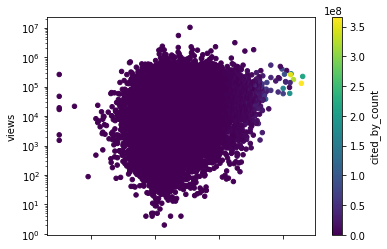

In [56]:
df_pc[['works_count',
              'cited_by_count',
              'page_edits',
              'len',
              'views',
              'references']].plot.scatter(x='works_count', y='views',
                                          c='cited_by_count',
                                          colormap='viridis',
                                          loglog=True)

In [54]:
import matplotlib